<a href="https://colab.research.google.com/github/Manu-Sanchez/Learning/blob/ai%2Fbasic-gan/Linear_Regression_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Summary
In this lecture you will find a basic linear regression model.

**A linear regression model is used for predict continuous values, in our case, we're going to predict random values**.


First of all we're going to start doing the library import.

- torch: for the maching learning model
- numpy: for the data structures
- matplotlib: for plotting data

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import torch.nn as nn

## Setting the hyperparameters
For our purpose we're going to select a random seed (so you'll be able to replicate the same results in your computer)

- Epoch: Number of times we're going to pass the entire dataset in the model to train it
- Seed: Value that will make our code replicable
- Input Size: Size of the input layer
- Output Size: Size of the output layer

In [46]:
epochs = 50
seed = 42
in_size = 1
out_size = 1

torch.manual_seed(seed)

## Data Generation
We're going to create 50 different points between 0 and 1 and we're going to generate the Y value of this points using a random function something like this

- x = [1, 50]
- y = 2 * x + e

**where e is a random value between [-9, 9]

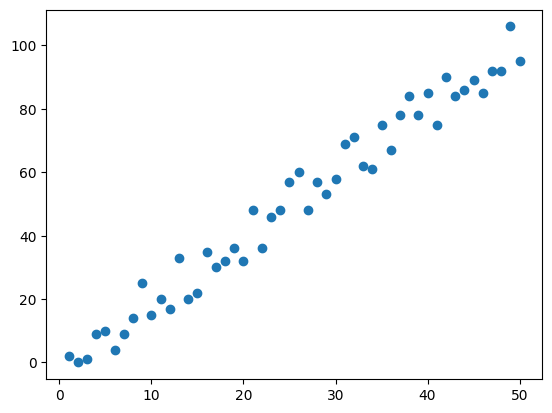

In [47]:
x = np.linspace(1, 50, 50).reshape(-1, 1)
e = np.random.randint(-9, 9, 50).reshape(-1, 1)

y = 2 * x + e

plt.scatter(x, y)

## Model Definition
We're going to create a model with only one linear layer.

this will receive the input values and will return a predicted value.

The equation this model follows is the following one:
y_pred = weight * value + bias

In [49]:
class Model(nn.Module):

  def __init__(self, in_features, out_features):
    super().__init__()
    self.linear = nn.Linear(in_features, out_features)


  def forward(self, x):
    y_pred = self.linear(x)
    return y_pred


model = Model(1,1)

### Actual Regression Line

By default when creating a Linear model, this starts with a random weight and a random bias, we can take this values to plot the actual regression line and see how far are we from the optimal regression line.



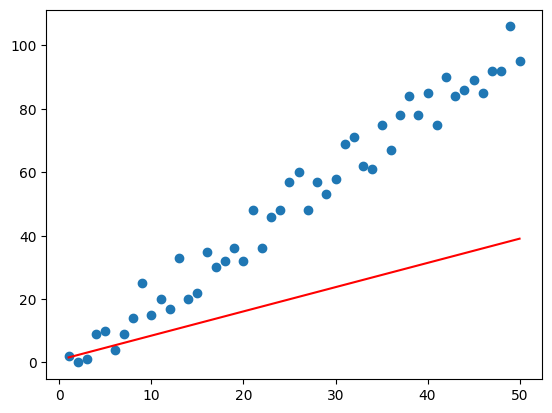

In [52]:
current_weight = model.linear.weight.item()
current_bias = model.linear.bias.item()

plt.scatter(x,y)

regression_line_x = np.linspace(1, 50, 50)
regression_line_y = current_weight * regression_line_x + current_bias

plt.plot(regression_line_x, regression_line_y, 'r')

In [11]:
#How can we show all the parameters
for name, param in model.named_parameters():
  print(f"Name: {name}, Value: {param.item()}")

Name: linear.weight, Value: 0.10597813129425049
Name: linear.bias, Value: 0.9637961387634277


## Defining optimizers and loss functions

We're going to use MSE (Mean Squared Error) for calculater our loss (error).

And Stochastic Gradient Descent for optimizing the model

In [53]:
criterion = nn.MSELoss() #Performance evaluation

In [54]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3) #SDG Stochastic Gradient Descent

## Main Loop
Now we're going to define the main loop.
We're going to move forward for each epoch, predict our values and then calculate the actual loss (error) of the model.

Once this is done, we're going to restart the gradients for each epoch to prevent issues when doing the gradient descent and finally, update the actual weights and bias.

It's also recomended to print how the model it's actually going.


In [58]:
losses = []

x = torch.tensor(x, dtype=torch.float)
y = torch.tensor(y, dtype=torch.float)

for i in range(epochs):
  i += 1

  #Prediction
  y_pred = model.forward(x)

  #Calculate LOSS (ERROR)
  loss = criterion(y_pred, y)

  #Record the error
  losses.append(loss)

  print(f"epoch {i} loss: {loss.item()} weight: {model.linear.weight.item()} bias: {model.linear.bias.item()}")

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


epoch 1 loss: 1256.220458984375 weight: 0.7645385265350342 bias: 0.8300079107284546
epoch 2 loss: 662.5447387695312 weight: 2.817495584487915 bias: 0.8893964290618896
epoch 3 loss: 356.0498352050781 weight: 1.3424965143203735 bias: 0.8439653515815735
epoch 4 loss: 197.81625366210938 weight: 2.402387857437134 bias: 0.8738501071929932
epoch 5 loss: 116.12458801269531 weight: 1.640921711921692 bias: 0.8496206402778625
epoch 6 loss: 73.94890594482422 weight: 2.1881284713745117 bias: 0.8642743825912476
epoch 7 loss: 52.17390060424805 weight: 1.7950339317321777 bias: 0.8509913086891174
epoch 8 loss: 40.931007385253906 weight: 2.0775601863861084 bias: 0.8577826023101807
epoch 9 loss: 35.125450134277344 weight: 1.8746424913406372 bias: 0.8501514792442322
epoch 10 loss: 32.12700653076172 weight: 2.0205235481262207 bias: 0.8528844118118286
epoch 11 loss: 30.577781677246094 weight: 1.9157875776290894 bias: 0.8481719493865967
epoch 12 loss: 29.77674102783203 weight: 1.9911234378814697 bias: 0.8488

## Checking how the training went

Now we can plot the error obtained for earch epoch and see the training curve

Text(0.5, 0, 'Epoch')

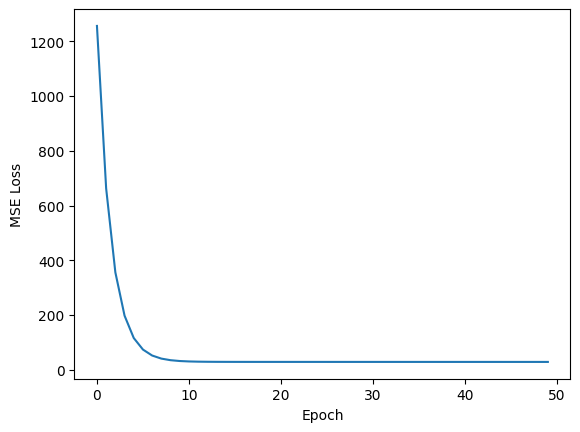

In [59]:
plt.plot(range(0,len(losses)), [loss.detach().numpy() for loss in losses])
plt.ylabel('MSE Loss')
plt.xlabel('Epoch')

## Plot the obtained regression line

We want to see how fits now the regression line with our model, so for achieve this, we'll take 50 points between 1 and 50 to predict the value in that position and generate the actual regression line

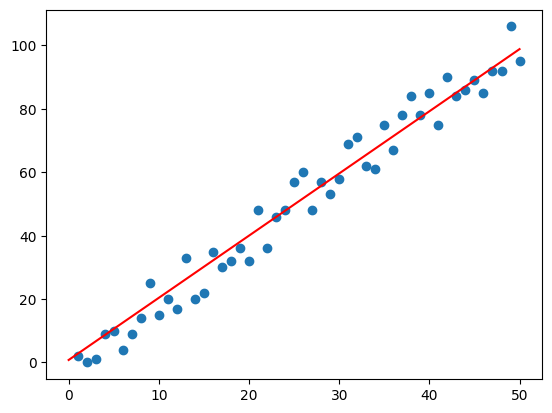

In [60]:
x1 = np.linspace(0., 50., 50)
w1 = model.linear.weight.item()
b1 = model.linear.bias.item()

y1 = w1 * x1 + b1

plt.scatter(x.numpy(), y.numpy())
plt.plot(x1, y1, 'r')